# Lenet:

In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Convolution2D

In [4]:
from tensorflow.keras.layers import MaxPooling2D

In [5]:
from tensorflow.keras.layers import Flatten

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
Classifier=Sequential()

In [9]:
Classifier.add(Convolution2D(32,3,3,input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(2, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 74, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 5

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
training_set=train_datagen.flow_from_directory('data/train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 724 images belonging to 2 classes.


In [14]:
test_set=test_datagen.flow_from_directory('data/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 305 images belonging to 2 classes.


In [15]:
from IPython.display import display

In [16]:
#img_dims = 150
epochs = 20
batch_size = 32

In [17]:
#pip install Pillow 

In [18]:
from PIL import Image

In [19]:
Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
22/22 [==============================] - 25s 1s/step - loss: 0.7330 - accuracy: 0.5694 - val_loss: 0.5244 - val_accuracy: 0.7882
Epoch 2/20
22/22 [==============================] - 24s 1s/step - loss: 0.4478 - accuracy: 0.8078 - val_loss: 0.3617 - val_accuracy: 0.8507
Epoch 3/20
22/22 [==============================] - 23s 1s/step - loss: 0.3554 - accuracy: 0.8598 - val_loss: 0.3628 - val_accuracy: 0.8403
Epoch 4/20
22/22 [==============================] - 24s 1s/step - loss: 0.3537 - accuracy: 0.8483 - val_loss: 0.4437 - val_accuracy: 0.8299
Epoch 5/20
22/22 [==============================] - 24s 1s/step - loss: 0.3235 - accuracy: 0.8540 - val_loss: 0.4616 - val_accuracy: 0.7917
Epoch 6/20
22/22 [==============================] - 24s 1s/step - loss: 0.2751 - accuracy: 0.8931 - val_loss: 0.7082 - val_accuracy: 0.7674
Epoch 7/20
22/22 [==============================] - 23s 1s/step - loss: 0.3003 - acc

In [20]:
import h5py

In [21]:
#Classifier.save('road.h5')
       

In [22]:
from keras.models import load_model

In [23]:
model=load_model('road.h5')

In [24]:
import numpy as np

In [25]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('p.jpg',target_size=(224,224))

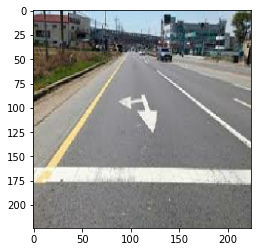

In [26]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [27]:
test_image=image.img_to_array(test_image)

In [28]:
test_image=np.expand_dims(test_image,axis=0)

In [29]:
result=model.predict(test_image)

In [30]:
prediction = result[0]

In [31]:
classes=training_set.class_indices

In [32]:
classes

{'plain': 0, 'pothole': 1}

In [33]:
prediction=list(prediction)

In [34]:
prediction

[1.0, 0.0]

In [36]:
classes=['plain', 'pothole']

In [37]:
output=zip(classes,prediction)

In [38]:
output=dict(output)

In [39]:
output

{'plain': 1.0, 'pothole': 0.0}

In [40]:

if output['plain']==1.0:
    print("plain")
elif output['pothole']==1.0:
    print("pothole")


plain
